In [15]:
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from dash import dcc
import ipywidgets as widgets
from IPython.display import display, IFrame
from IPython.display import display
from dash import html
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
from plotly.offline import plot
import dash


In [13]:
# calculate the weighted average of the number of steps in each journey
channel_stacks = pd.read_csv('conversion-path.csv')

#Calculate average conversion
# Read the data
data = pd.read_csv('attribution data.csv')

# Filter for conversions (conversion = 1)
total_conversions = (data['conversion'] == 1).sum()

# Group by channel and count the number of conversions
average_conversions = total_conversions/len(data['conversion'])
print("Average_conversion_rate:", average_conversions)
print("Total conversion:", total_conversions)


avg_steps = data.groupby('visitor_id')['campaign'].count().mean()
print("Avg_touchponts:", avg_steps)

Average_conversion_rate: 0.030062873144185556
Total conversion: 17639
Avg_touchponts: 2.4436378629616673


In [14]:
# Bar chart - Set template with white background and dark theme
template = 'plotly_white'
plot_bgcolor = 'white'
paper_bgcolor = 'white'

# Read the data
data = pd.read_csv('attribution data.csv')

# Colour
sns.set_palette("colorblind")
color_map = {
    'Facebook': '#0072B2',
    'Instagram': '#009E73',
    'Online display': '#D55E00',
    'Online video': '#CC79A7',
    'Paid search': '#F0E442'
}

# Filter for conversions (conversion = 1)
conversions = data[data['conversion'] == 1]

# Group by channel and count the number of conversions
conversion_counts = conversions.groupby('campaign').size()

# Create a dataframe for the chart
df = pd.DataFrame({'Channel': conversion_counts.index, 'Conversion Count': conversion_counts.values})

# Create the plotly chart
fig1 = px.bar(df, x='Channel', y='Conversion Count', color='Channel', title='Conversion Counts by Channel', color_discrete_map=color_map)

fig1.update_layout(
    xaxis_title='', 
    yaxis_title='Number of Conversions', 
    font=dict(family='Arial', size=10), # Set font to Arial and size to 8
    title=dict(text='<b>CONVERSION COUNTS BY CHANNEL<b>', font=dict(size=14, family='Arial', color='black'),x=0, y=0.98), # Set title to capital letters, bold and Arial font
    showlegend=False, 
    template=template, 
    plot_bgcolor=plot_bgcolor, 
    paper_bgcolor=paper_bgcolor,
    height=320,
    width=308,
    margin=dict(
        l=20, # Set left margin to 50 pixels
        r=20, # Set right margin to 20 pixels
        t=20, # Set top margin to 50 pixels
        b=50  # Set bottom margin to 50 pixels
    )
)
fig1a = dcc.Graph(figure=fig1)
pio.renderers.default = 'iframe'
fig1.show()



In [4]:
#COlumn
import pandas as pd
import plotly.express as px
import seaborn as sns

data = pd.read_csv('attribution data.csv')

# count the number of occurrences of each campaign
campaign_counts = data['campaign'].value_counts()

# set the color palette to Seaborn's colorblind palette
sns.set_palette("colorblind")
color_map = {
    'Facebook': '#0072B2',
    'Instagram': '#009E73',
    'Online display': '#D55E00',
    'Online video': '#CC79A7',
    'Paid search': '#F0E442'
}

#create a dataframe
df = pd.DataFrame({'Channel': campaign_counts.index, 'Touchpoint Count': campaign_counts.values})

# create a bar chart of the campaign counts
fig2 = px.bar(df, x = 'Touchpoint Count', y = 'Channel', color = 'Channel',
    orientation='h',
    title='Most Common Touchpoints',
    color_discrete_map=color_map,
    labels={'x': 'Count', 'y': ' '},
)

# remove the legend
fig2.update_layout(showlegend=False)
fig2.update_layout(plot_bgcolor=plot_bgcolor, paper_bgcolor=paper_bgcolor)
fig2.update_layout(font=dict(family='Arial', size=10)), # Set font to Arial and size to 8
fig2.update_layout(height=320, width=400, font=dict(size=6), margin=dict(l=5, r=0, b=0, t=20, pad=4))
fig2.update_layout(xaxis_title='Touchpoint Counts', yaxis_title='')
fig2.update_layout(title=dict(text='<b>MOST COMMON TOUCHPOINTS<b>', font=dict(size=14, family='Arial', color='black'),x=0, y=0.98)) # Set title to capital letters, bold and Arial font
 # Set title to capital letters, bold and Arial font

fig2a = dcc.Graph(figure=fig2)


pio.renderers.default = 'iframe'
fig2.show()


In [ ]:

#bubble chart
sns.set_palette("colorblind")
channel_stacks = pd.read_csv('conversion-path.csv')
fig3 = px.scatter(channel_stacks, x='path_count', y='conversion', color='conversion_rate', size='conversion_rate', hover_data = ['path'])

fig3.update_layout(
    xaxis=dict(type='log', title='Number of Paths'),
    yaxis=dict(type='log', title='Number of Conversions'),
    coloraxis=dict(colorbar=dict(title='Rate'),
))
fig3.update_layout(font=dict(family='Arial', size=8)), # Set font to Arial and size to 8
fig3.update_layout(template='plotly_white', plot_bgcolor='white', paper_bgcolor='white')
fig3.update_layout(height=304, width=720)
fig3.update_layout(title=dict(text='<b>CONVERSION BY PATHS<b>', font=dict(size=14, family='Arial', color='black'),x=0, y=0.95)) # Set title to capital letters, bold and Arial font
fig3.update_layout(margin=dict(l=5, r=5, t=25, b=0))


fig3a= dcc.Graph(figure=fig3)

pio.renderers.default = 'iframe'
fig3.show()



In [6]:

#stankey diagram
combos = pd.read_csv('combos1.csv', index_col = 0)
combos

display_node_labels = ['1: FB', '1:Insta', '1:OD', '1:OV',
                       '1:PS', '2:FB', '2:Insta', '2:OD',
                       '2:OV', '2:PS', '3', '3',
                       '3', '3', '3', '4',
                       '4', '4', '4', '4',
                       'Conversion']

# Define node colors
sns.set_palette("colorblind")
node_colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442',
               '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442',
               '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442',
               '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442']

# Define link colors
link_colors = []
for source, target in zip(combos["source"], combos["target"]):
    if target == 21:
        # Link leads to conversion
        link_colors.append(node_colors[source - 1])
    else:
        # Link does not lead to conversion
        source_color = node_colors[source - 1]
        target_color = node_colors[target - 1]
        # Set transparency to 0.2
        link_colors.append(f"rgba({','.join(str(int(c * 255)) for c in sns.color_palette([source_color, target_color], n_colors=2)[0][:3])}, 0.2)")

# Generate Sankey diagram
fig4 = go.Figure(data=[go.Sankey(
    orientation="v",
    node=dict(
        label=display_node_labels,
        color=node_colors,
        pad=10,
        thickness=30,
        line=dict(color="black", width=0),
    ),
    link=dict(
        source=combos["source"].values - 1,  # convert to zero index
        target=combos["target"].values - 1,  # convert to zero index
        value=combos["value"].values,  # size of connection
        color=link_colors, # color based on source and target groups
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
                      '<extra>Conversion: %{target.label == "Conversion"}</extra>',
    ),visible=True
)])

fig4.update_layout(
    font=dict(
        family="Arial",
        size=9,
    ),
    margin=dict(l=5),
    width=458,
    height=628,
    legend=dict(
        font=dict(
            size=8 # set legend font size to 8
        )
    )
)
fig4.update_layout(title=dict(text='<b>CONVERSION FLOW DIAGRAM<b>', font=dict(size=14, family='Arial', color='black'),x=0, y=0.98)) # Set title to capital letters, bold and Arial font
fig4.update_layout(margin=dict(l=5, r=5, t=26, b=5))

import plotly.io as pio
fig4a=dcc.Graph(figure=fig4)
pio.renderers.default = 'iframe'
fig4.show()


In [8]:

#Touchpoint
text_box = html.Div(
    children=[        html.H2(['Average',html.Br(),'Touchpoint'], style={'color': 'black', 'font-size': '20px', 'margin-top': '10px', 'font-weight': 'bold'}),        html.H1('2.4', style={'color': '#0072B2', 'font-size': '35px', 'margin-top': '5px', 'margin-bottom': '5px','font-weight': 'bold'})    ],
    style={
        'text-align': 'center',
        'background-color': 'white',
        'width': '229px',
        'height': '17vh',
        'padding': '20px',
        'box-shadow': '5px 5px 15px rgba(0,0,0,0.2)',
        'line-height': '0.9',
        'margin-left': '0vh'
    }
)

#Conversion

text_box2 = html.Div(
    children=[        html.H2(['Total',html.Br(),'Conversion'], style={'color': 'black', 'font-size': '20px', 'margin-top': '10px','font-weight': 'bold'}),        html.H1('21763', style={'color': '#0072B2', 'font-size': '35px', 'margin-top': '5px', 'margin-bottom': '5px','font-weight': 'bold'})    ],
    style={
        'text-align': 'center',
        'background-color': 'white',
        'width': '230px',
        'height': '17vh',
        'padding': '20px',
        'box-shadow': '5px 5px 15px rgba(0,0,0,0.2)',
        'line-height': '0.9',
    }
)

#Conversion rate

text_box3 = html.Div(
    children=[        html.H2('Average Conversion Rate', style={'color': 'black', 'font-size': '20px', 'margin-top': '10px','font-weight': 'bold'}),        html.H1('0.3', style={'color': '#0072B2', 'font-size': '30px', 'margin-top': '5px', 'margin-bottom': '5px','font-weight': 'bold'})    ],
    style={
        'text-align': 'center',
        'background-color': 'white',
        'width': '240px',
        'height': '17vh',
        'padding': '20px',
        'box-shadow': '5px 5px 15px rgba(0,0,0,0.2)',
        'line-height': '0.9',
    }
)


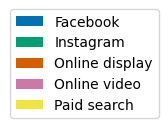

In [9]:


import base64
import matplotlib.pyplot as plt

# Define color codes and labels
color_codes = {'Facebook': '#0072B2',
               'Instagram': '#009E73',
               'Online display': '#D55E00',
               'Online video': '#CC79A7',
               'Paid search': '#F0E442'}
labels = list(color_codes.keys())

# Create legend image
fig, ax = plt.subplots(figsize=(1, 1))
for label in labels:
    ax.bar(0, 0, color=color_codes[label], label=label)
ax.set_axis_off()
ax.legend(loc='center')
# Save the legend image
plt.savefig('legend.png', dpi=300, bbox_inches='tight')
plt.show()

with open('legend.png', 'rb') as f:
    image_data = base64.b64encode(f.read()).decode('utf-8')



In [10]:
title_area = html.Div(
    [
        dbc.Row(
            [
                dbc.Col(
                    html.H1(
                        "Attribution and Customer Journey",
                        className="text-center",
                        style={
                            "color": "white",
                            "font-family": "Arial",
                            "font-weight": "bold",
                            "margin-top": "0px",
                            "font-size": "24px"
                        },
                    ),
                    width={"size": 10, "offset": 1}
                )
            ],
            align="center",
            style={
                "background-color": "#6DA9D2",
                "box-shadow": "0 4px 8px 0 rgba(0,0,0,0.2)",
                "display": "flex",
                "justify-content": "center",
                "align-items": "center", "height": "17vh", "padding":"1vh", "margin-bottom":"0vh", "margin-top":"3vh", "margin-left":"3hv"}
            
        )
    ]
)


In [12]:

# Initialize the app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])
server=app.server
# Define the sidebar
sidebar = html.Div([
    dbc.Row([
        title_area
    ], style={"height": "20vh"}),
    dbc.Row([
        dbc.Col([
            html.Div([
                dcc.Graph(
                    id='fig4a',
                    figure=fig4,
                    style={'margin-left': '1vh', 'margin-top': '3hv', 'height': '100%', 'width': '100%'}
                )
            ])
        ], width=4),
        dbc.Col([
            html.Div([
                html.Img(
                    src='data:image/png;base64,{}'.format(image_data),
                    style={'width': '10vh', 'height': '10vh', 'float': 'right'}
                )
            ],
                style={'width': '15vh', 'height': '15vh', 'position': 'absolute', 'bottom': '0', 'right': '0', 'margin-bottom': '0vh', 'margin-right': '5vh'}
            )
        ], width=1)
    ],
        style={"height": "80vh", 'position': 'absolute', 'width': '4', 'margin-top':'3vh'}
    )
])

# Define the graph wrapper
graph_wrapper = html.Div([
    dbc.Row([
        dbc.Col([
            dcc.Graph(
                id='fig1a',
                figure=fig1, style ={'width':'50%', 'display': 'inline-block'}
            )
        ], width=4),
        dbc.Col([
            dcc.Graph(
                id='fig2a',
                figure=fig2, style={'width':'50%','display': 'inline-block'}
            )
        ], width=4)
    ],
        style={"height": "40vh", "margin-bottom": "1vh", "margin-top": "1vh", "display": "flex"}
    )
])

# Define the content
content = html.Div([
    dbc.Row([
        dbc.Col([
            text_box
        ],
            width=3),
        dbc.Col([
            text_box2
        ],
            width=3),
        dbc.Col([
            text_box3, 
        ],
            width=3),
    ],
        style={"height": "20vh", "padding": "1vh", "margin-bottom": "0vh", "margin-top": "2vh", 'left':'0vh'}
    ),
    graph_wrapper,
    dbc.Row([
        dbc.Col([
            dcc.Graph(
                id='fig3a',
                figure=fig3, style={"width":'7', 'position': 'absolute'}
            )
        ],
            width=8)
    ],
        style={"height": "40vh", "margin-top": "0vh", "margin-bottom":"4vh"}
    )
],
    style={'margin-left': '0.0vh'}
)

# Define the layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(sidebar, width=4, className='bg-light'),
        dbc.Col(content, width=8, className='bg-light')
    ],
        style={"height": "100vh"}
    )
],
    fluid=True
)

if __name__ == "__main__":
    app.run_server(debug=True, use_reloader=False)



NameError: name 'title_area' is not defined

In [11]:
import pkg_resources
# list packages to be checked
root_packages = [
    'geoviews', 'geopandas', 'pandas', 'numpy', 
    'matplotlib', 'shapely', 'cartopy', 'holoviews', 'seaborn','IPython'
    'mapclassify', 'fiona', 'bokeh', 'plotly', 'voila', 'voila-gridstack', 'ipywidgets', 'dash']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

ipywidgets==8.0.4
plotly==5.13.1
matplotlib==3.7.1
dash==2.9.1
numpy==1.23.5
Fiona==1.8.21
Shapely==1.8.5
pandas==1.5.3
seaborn==0.12.2
geopandas==0.11.1
voila==0.4.0
voila-gridstack==0.3.1
